[*********************100%***********************]  1 of 1 completed


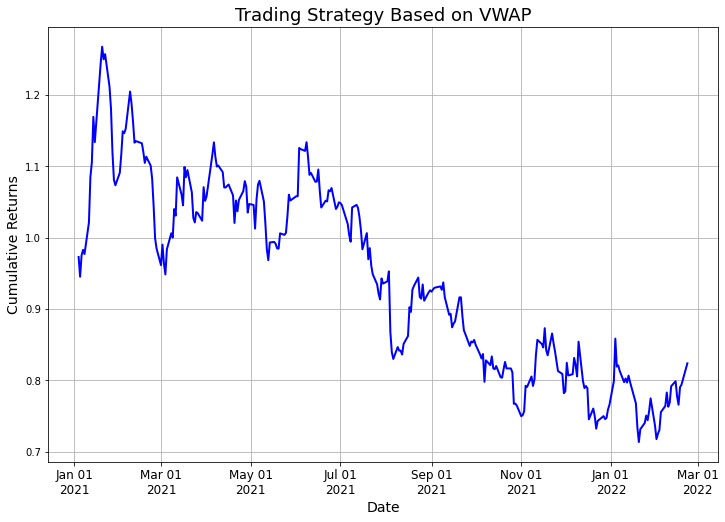

In [7]:
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

class VWAPStrategy:
    def __init__(self, ticker, start_date, end_date):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        
    def download_data(self):
        self.data = yf.download(self.ticker, self.start_date, self.end_date)
        
    def calculate_vwap(self):
        self.data['TP'] = (self.data['High'] + self.data['Low'] + self.data['Close']) / 3
        self.data['TPV'] = self.data['TP'] * self.data['Volume']
        self.data['Cumulative TPV'] = self.data['TPV'].cumsum()
        self.data['Cumulative Volume'] = self.data['Volume'].cumsum()
        self.data['VWAP'] = self.data['Cumulative TPV'] / self.data['Cumulative Volume']
        
    def generate_signals(self):
        self.data['Signal'] = [1 if self.data['Close'][i] > self.data['VWAP'][i] else -1 for i in range(len(self.data))]
        
    def calculate_returns(self):
        self.data['Returns'] = self.data['Close'].pct_change()
        self.data['Strategy Returns'] = self.data['Returns'] * self.data['Signal'].shift(1)
        
    def calculate_trades(self):
        self.data['Positive Trades'] = [1 if self.data['Strategy Returns'][i] > 0 else 0 for i in range(len(self.data))]
        self.data['Negative Trades'] = [1 if self.data['Strategy Returns'][i] < 0 else 0 for i in range(len(self.data))]
        
    def calculate_cumulative_returns(self):
        self.data['Cumulative Returns'] = (self.data['Strategy Returns'] + 1).cumprod()
        
    def plot_cumulative_returns(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.plot(self.data['Cumulative Returns'], linewidth=2, color='blue')

        ax.set_xlabel('Date', fontsize=14)
        ax.set_ylabel('Cumulative Returns', fontsize=14)
        ax.set_title('Trading Strategy Based on VWAP', fontsize=18)

        date_format = '%b %d\n%Y'
        date_formatter = plt.matplotlib.dates.DateFormatter(date_format)
        ax.xaxis.set_major_formatter(date_formatter)
        ax.xaxis.set_tick_params(labelsize=12)

        ax.grid(True)

        plt.show()

    def run_strategy(self):
        self.download_data()
        self.calculate_vwap()
        self.generate_signals()
        self.calculate_returns()
        self.calculate_trades()
        self.calculate_cumulative_returns()
        self.plot_cumulative_returns()

# Initialize the strategy with the desired parameters
ticker = "GM"
start_date = dt.datetime(2021, 1, 1)
end_date = dt.datetime(2022, 2, 23)
my_strategy = VWAPStrategy(ticker, start_date, end_date)

# Run the strategy
my_strategy.run_strategy()
